In [9]:
import os

def git_get():
    '''Get latest version from github'''
    os.system("git remote update")
    os.system("git pull")
    
def git_put(message):
    '''Adds/commits this notebook'''
    os.system("git add ML_projekt1.ipynb")
    os.system('git commit -m "{}"'.format(message))
    os.system("git push")

# Project starts here

In [1]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

## Analysis goals

The ultimate goal for this dataanalysis is to determine which features make a movie "successful". The definition of "successful" is of course a bit vague, but during this dataanalysis we will define success as high popularity and/or gross revenue.

In our initial dataanalysis we will use regression to detemine if there is a correlation between IMDB score and revenue.

## Method of analysis

This analysis uses the OSEMN model.<br><br>
https://machinelearningmastery.com/how-to-work-through-a-problem-like-a-data-scientist/

# 1. Obtain Data

## Dataset source and description

The IMDB Movie dataset from Kaggle.com, contains information from 5000 movies, obtained by webscraping IMDB.com. Note that the dataset has recently been removed from Kaggle and replaces with a new dataset which is not compliant with this notebook. Kaggle hosts a multitude of "kernels" (runable data science papers), with titles such as: "film recommendation engine", "Movie Recommendations" and "Categorizing actors".

https://www.kaggle.com/tmdb/tmdb-movie-metadata/data


# 2. Scrub Data

Data is contained in a dictionary named data.

To secure that the dataset is complete, every row which contains N/A is removed. 

In [2]:
data = {}
data['raw'] = pd.read_csv("movie_metadata.csv")
data['no_na'] = data['raw'].dropna();
data['n_removed_na'] = data['raw'].shape[0] - data['no_na'].shape[0]
print(f"Number of removed rows: {data['n_removed_na']}")

Number of removed rows: 1287


This number is quite high, but it makes working with the dataset a lot easier and at the same time there is consistency through the dataset. 

# 3. Explore Data

A summary of the statistics are given below, including the mean, standard deviation, and the different quartiles for each attribute.

(((Argumenter for vigtifhed af tbeell)))

In [4]:
data['no_na'].describe().round(decimals=2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.00,3756.00,3756.00,3756.00,3756.00,3.756000e+03,3756.00,3756.00,3756.00,3756.00,3.756000e+03,3756.00,3756.00,3756.00,3756.00,3756.00
mean,167.38,110.26,807.34,771.28,7751.34,5.261282e+07,105826.73,11527.10,1.38,336.84,4.623685e+07,2002.98,2021.78,6.47,2.11,9353.83
std,123.45,22.65,3068.17,1894.25,15519.34,7.031787e+07,152035.40,19122.18,2.04,411.23,2.260103e+08,9.89,4544.91,1.06,0.35,21462.89
min,2.00,37.00,0.00,0.00,0.00,1.620000e+02,91.00,0.00,0.00,4.00,2.180000e+02,1927.00,0.00,1.60,1.18,0.00
25%,77.00,96.00,11.00,194.00,745.00,8.270233e+06,19667.00,1919.75,0.00,110.00,1.000000e+07,1999.00,384.75,5.90,1.85,0.00
50%,138.50,106.00,64.00,436.00,1000.00,3.009311e+07,53973.50,4059.50,1.00,210.00,2.500000e+07,2004.00,685.50,6.60,2.35,227.00
75%,224.00,120.00,235.00,691.00,13000.00,6.688194e+07,128602.00,16240.00,2.00,398.25,5.000000e+07,2010.00,976.00,7.20,2.35,11000.00
max,813.00,330.00,23000.00,23000.00,640000.00,7.605058e+08,1689764.00,656730.00,43.00,5060.00,1.221550e+10,2016.00,137000.00,9.30,16.00,349000.00


Identify number of columns with object data

In [5]:
data['raw'].dtypes.value_counts()     # Check datatypes

float64    13
object     12
int64       3
dtype: int64

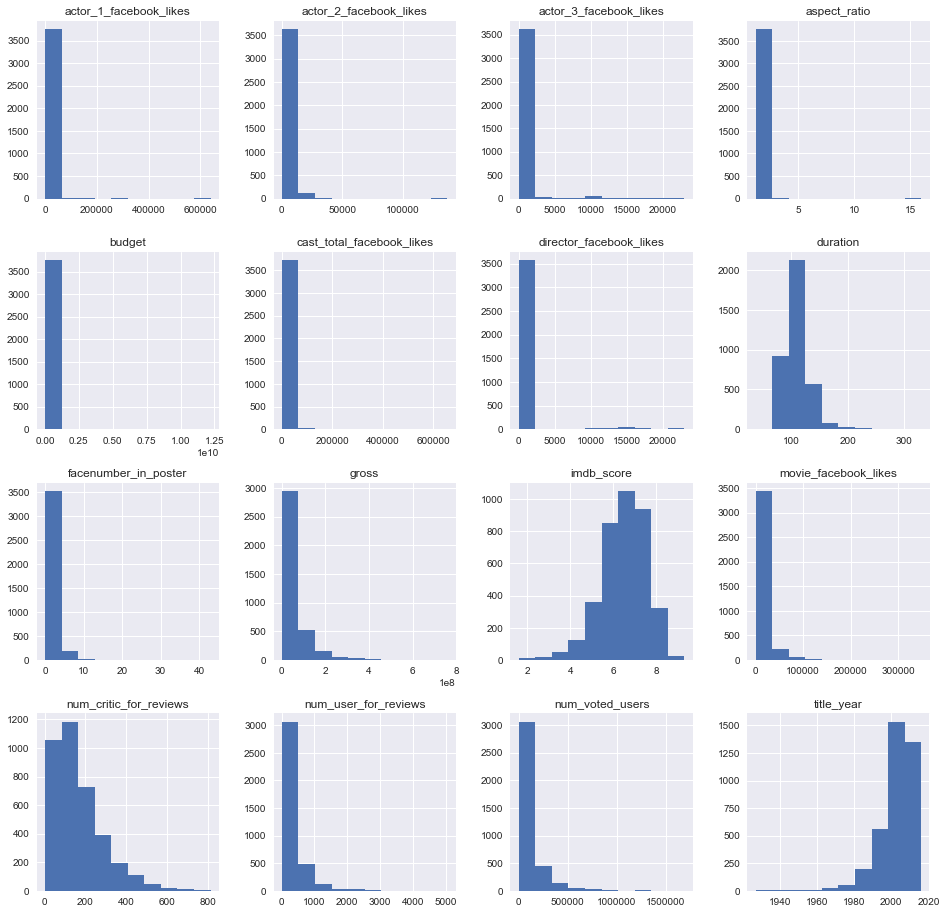

In [6]:
data['no_na'].hist(figsize=(16,16));

In the following table all the 28 different attributes are explained and it's shown whether they are discrete or continous together with their level of measurement.  


<table valign="left">
  <tr>
    <th>Attribute</th>
    <th>Explanation</th>
    <th>Discrete/continous</th>
    <th>Nominal/Ordinal/Interval/Ratio</th>
  </tr>
  <tr>
    <td>color</td>
    <td>Is the movie in color or black and white</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>director_name</td>
    <td>Name of the director</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>num_critic_for_reviews</td>
    <td>Number of critics reviews</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>duration</td>
    <td>Duration of the movie</td>
    <td>Continous</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>director_facebook_likes</td>
    <td>The directors amount of facebook likes</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>actor_3_facebook_likes</td>
    <td>Third actor likes on Facebook</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>actor_2_name</td>
    <td>Second actor's name</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>actor_1_facebook_likes</td>
    <td>First actor likes on Facebook</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>gross</td>
    <td>Gross income of the movie</td>
    <td>Continous</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>genres</td>
    <td>The movies genre </td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>actor_1_name</td>
    <td>First actor's name</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>movie_title</td>
    <td>Title of the movie</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>num_voted_users</td>
    <td>Number of votes at IMDB</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>cast_total_facebook_likes</td>
    <td>Total Facebook likes for the cast</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>actor_3_name</td>
    <td>Third actor's name</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>facenumber_in_poster</td>
    <td>Amount of faces in the poster</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>plot_keywords</td>
    <td>Keyword related to movie plot</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>movie_imdb_link</td>
    <td>The movies imdb link</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>num_user_for_reviews</td>
    <td>Number of user reviews</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>language</td>
    <td>Spoken language</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>country</td>
    <td>Country of origin </td>
    <td>Discrete</td>
    <td>Nominal </td>
  </tr>
  <tr>
    <td>content_rating</td>
    <td>Content rating</td>
    <td>Discrete</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>budget</td>
    <td>The budget of the movie</td>
    <td>Continous</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>title_year</td>
    <td>Release date</td>
    <td>Discrete</td>
    <td>Interval</td>
  </tr>
  <tr>
    <td>actor_2_facebook_likes</td>
    <td>Second actor likes on Facebook</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>imdb_score</td>
    <td>Score on imdb (voted by users)</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
  <tr>
    <td>aspect_ratio</td>
    <td>Aspect ratio of the movie</td>
    <td>Discrete</td>
    <td>Nominal </td>
  </tr>
  <tr>
    <td>movie_facebook_likes</td>
    <td>Total Facebook likes of the movie</td>
    <td>Discrete</td>
    <td>Ratio</td>
  </tr>
</table>

By grouping the dataset features, we can select the correct machine learning strategy based on the table below.

<table>
  <tr>
    <th></th>
    <th>Supervised</th>
    <th>Unsupervised</th>
  </tr>
  <tr>
    <td>Continuous</td>
    <td>Regression</td>
    <td>Clustering</td>
  </tr>
  <tr>
    <td>Discrete</td>
    <td>Classification</td>
    <td>Association mining</td>
  </tr>
</table>

In the Principle Component Analysis we will ignore ALL catagorical data.

# Analysis

1. A description of your data set.
Explain
OK -- • What the problem of interest is (i.e. what is your data about),
OK -- • Where you obtained the data,
OK -- • What has previously been done to the data. (i.e. if available go through
some of the original source papers and read what they did to the data
and summarize what were their results).
Halvt-OK -- • What the primary machine learning modeling aim is for the data, i.e.
which attributes you feel are relevant when carrying out a classification,
a regression, a clustering, an association mining, and an anomaly detection
in the later reports and what you hope to accomplish using these
techniques. For instance, which attribute do you wish to explain in the
regression based on which other attributes? Which class label will you predict based on which other attributes in the classification task? If you need to transform the data to admit these tasks, explain roughly how you might do this (but don’t transform the data now!).


To get an overview of the dataset columns, we can look at the first entry in our dataframe.

2. A detailed explanation of the attributes of the data.
OK -- • Describe if the attributes are discrete/continous, Nominal/Ordinal/Interval/Ratio,
OK -- • give an account of whether there are data issues (i.e. missing values or
corrupted data) and describe them if so
OK -- • describe the basic summary statistics of the attributes.
If your data set contains many similar attributes, you may restrict yourself to
describing a few representative features (apply common sense).


## Data visualization

3. Data visualization(s) based on suitable visualization techniques including
a principal component analysis (PCA).
Touch upon the following subjects, use visualizations when it appears sensible.
Keep in mind the ACCENT principles and Tufte’s guidelines when you visualize
the data.
Mangler --• Are there issues with outliers in the data,
OK -- • do the attributes appear to be normal distributed,
OK -- • are variables correlated,
Mangler --• does the primary machine learning modeling aim appear to be feasible
based on your visualizations.
There are three aspects that needs to be described when you carry out the
PCA analysis for the report:
OK -- • The amount of variation explained as a function of the number of PCA
components included,
OK -- • the principal directions of the considered PCA components (either find a
way to plot them or interpret them in terms of the features),
Mangler --• the data projected onto the considered principal components.
If your attributes have very different scales it may be relevant to standardize
the data prior to the PCA analysis.

# 4. Model Data

## Preprocessing

Create numerical data from raw data

In [7]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data['raw'].iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data['raw'].columns.difference(str_list)

data['numerical'] = data['raw'][num_list]
data['numerical'] = data['numerical'].fillna(value=0, axis=1)

In [9]:
data['X_std'] = StandardScaler().fit_transform(data['numerical'].values)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(data['X_std'], axis=0)
cov_mat = np.cov(data['X_std'].T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

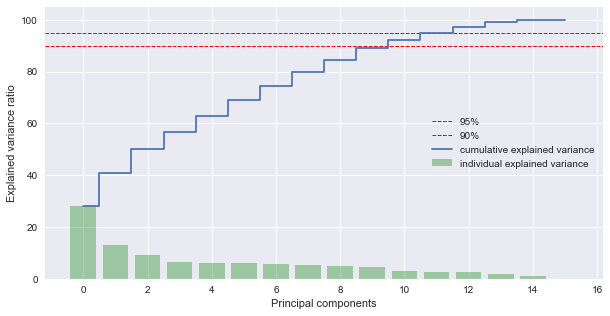

In [10]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.axhline(y=90, linewidth=1, color='r', linestyle='dashed', label="95%")
plt.axhline(y=95, linewidth=1, color='g', linestyle='dashed', label="90%")
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

From this plot we can see that 9 components explain 90% of the total variance. To get up to 95% we need 12 components.

Create correlation matrix from numerical features

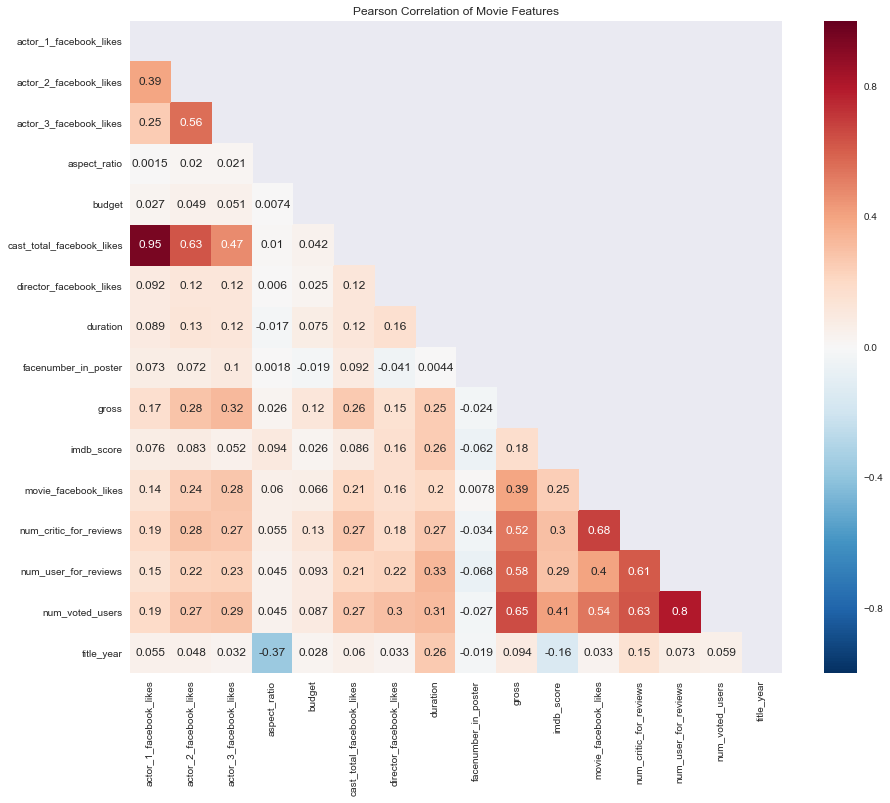

In [11]:
data['numerical_correlation'] = data['numerical'].corr()
f, ax = plt.subplots(figsize=(15, 12))
plt.title('Pearson Correlation of Movie Features')
mask = np.zeros_like(data['numerical_correlation'], dtype=np.bool) # Mask to remove diagonal and upper half
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data['numerical_correlation'],vmax=1,square=True,annot=True,mask=mask);

From our correlation matrix (heatmap), we can see that some movie features correlate quite well. We will use these features later in our PCA.

## PCA

In [12]:
pca = PCA(n_components=9)
data['PCA9'] = pca.fit_transform(data['X_std'])

In [15]:
pca.components_

array([[  2.26537959e-01,   2.69092218e-01,   2.55649644e-01,
          2.51814254e-02,   7.04155376e-02,   2.86620715e-01,
          1.57488211e-01,   2.00923379e-01,   4.49255429e-03,
          3.34787687e-01,   1.88229412e-01,   3.09612564e-01,
          3.65207243e-01,   3.53723574e-01,   3.90125786e-01,
          6.25180551e-02],
       [  4.84512912e-01,   3.58700909e-01,   2.65931877e-01,
         -4.47621437e-02,  -4.62290785e-02,   5.18423047e-01,
         -8.10640197e-02,  -1.39813398e-01,   1.72633547e-01,
         -1.36413153e-01,  -2.12892738e-01,  -1.54801378e-01,
         -1.84904784e-01,  -2.47576791e-01,  -2.31403365e-01,
          1.04642183e-02],
       [  2.54850556e-02,   3.26942578e-02,   3.11417767e-02,
          6.09901306e-01,  -5.39719314e-02,   3.27386578e-02,
         -3.23503420e-03,  -2.51608721e-01,   2.40692171e-02,
         -4.24500123e-02,   2.49541125e-01,   6.05129975e-02,
         -2.41996546e-02,  -1.20651684e-02,   3.27121654e-02,
         -6.9850

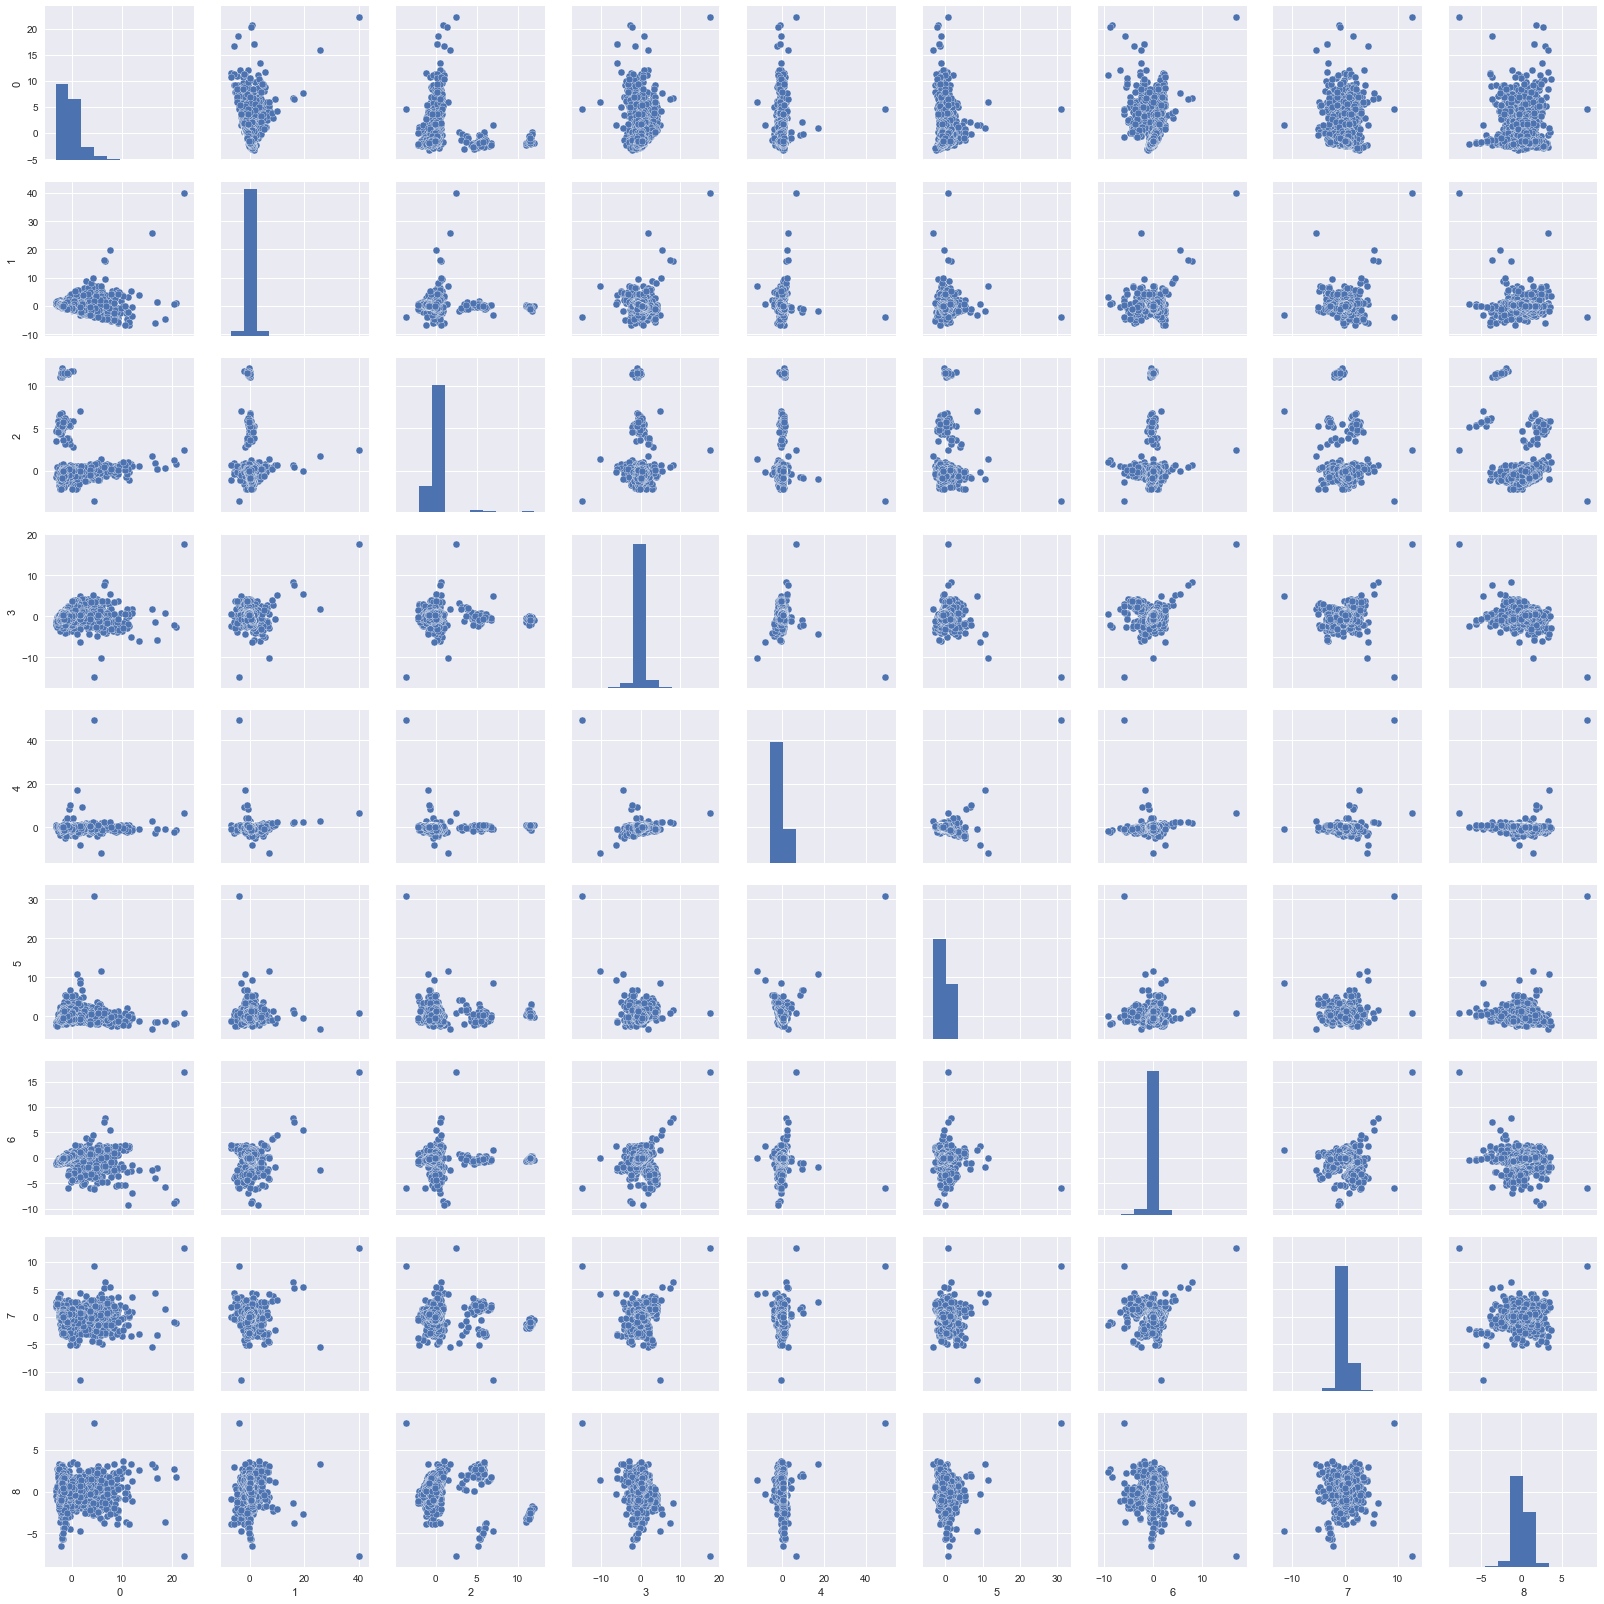

In [16]:
sns.pairplot(pd.DataFrame(data['PCA9']));

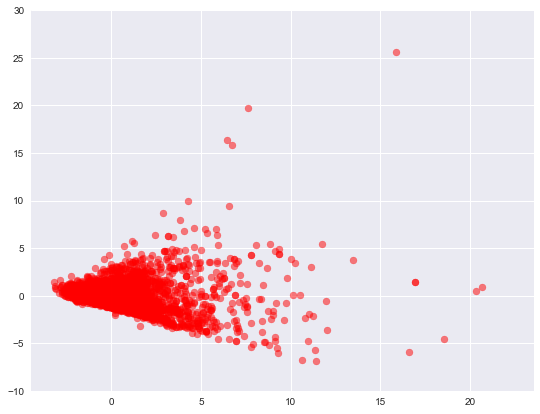

In [17]:
plt.figure(figsize = (9,7))
plt.scatter(data['PCA9'][:,0], data['PCA9'][:,1], c='red',alpha=0.5)
plt.ylim(-10,30)
plt.show()

By ploting component 0 against 1 we cannot really see anything useful.

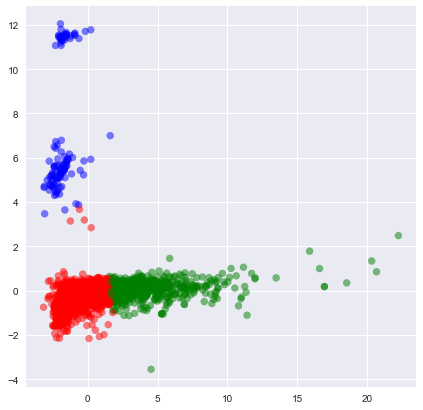

In [18]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(data['PCA9'])

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(data['PCA9'][:,0],data['PCA9'][:,2], c= label_color, alpha=0.5) 
plt.show()

c:\users\chris\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
c:\users\chris\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


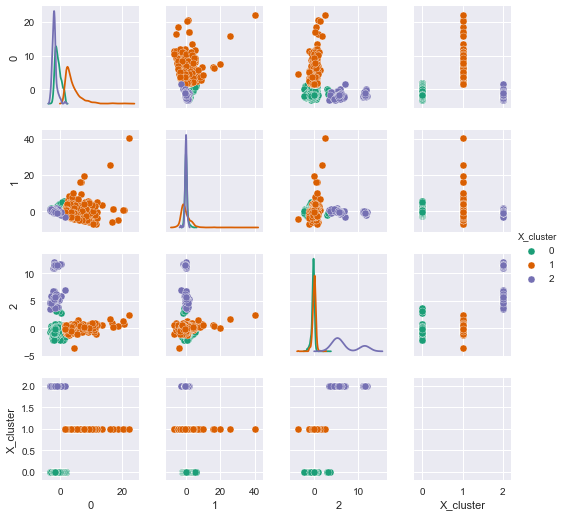

In [19]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(data['PCA9'])
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85);

# 5. Interpret Results